## Imports
Importing all important modules and classes required for model building

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers.recurrent import LSTM

## Importing Data 

Importing **50 different comments** for **10 different movies**.

In [ ]:
df1 = pd.read_csv('/content/A beautiful mind.csv')
df2 = pd.read_csv('/content/2012.csv')
df3 = pd.read_csv('/content/Amadeus.csv')
df4 = pd.read_csv('/content/Godfather.csv')
df5 = pd.read_csv('/content/Matrix Rev.csv')
df6 = pd.read_csv('/content/Avatar.csv')
df7 = pd.read_csv('/content/Les Miserables.csv')
df8 = pd.read_csv('/content/Star Wars.csv')
df9 = pd.read_csv('/content/The Expendables.csv')
df10 = pd.read_csv('/content/Clash of titans.csv')

In [ ]:
df2 = df2[['Comment', 'Polarity', 'Rating']] 
# There is some problem with the 2012 Title so we have removed it before hand
# It does not matter, as we are gonna remove the column later
df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10])
df

,Title,Comment,Polarity,Rating
0,A Beautiful Mind,"THis is a beautiful story, but the reality is ...",1,8
1,A Beautiful Mind,"Although this film was slow paced, it was kept...",1,8
2,A Beautiful Mind,Let me start by saying it doesn't matter how m...,1,10
3,A Beautiful Mind,I absolutely liked watching this film because ...,1,10
4,A Beautiful Mind,'A Beautiful Mind' had a lot going for it. An ...,1,7
...,...,...,...,...
45,Clash of the titans,"Don't get me wrong, I like the whole movie st...",1,6
46,Clash of the titans,Clash of the Titans is directed by Louis Leter...,0,5
47,Clash of the titans,The remake of a cult classic. Ray Harryhausen ...,1,7
48,Clash of the titans,Story/Plot - A war between Zeus and Hades is a...,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     450 non-null    object
 1   Comment   500 non-null    object
 2   Polarity  500 non-null    int64 
 3   Rating    500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 19.5+ KB


## Pre-Processing Data

- First we reduce the Data [**Rating**] from 1 to 10 -> 1 to 5
- Then Remove the movie [**Title**] and any Null value rows that may be present


In [ ]:
df['Rating'] = (df['Rating']+1)//2

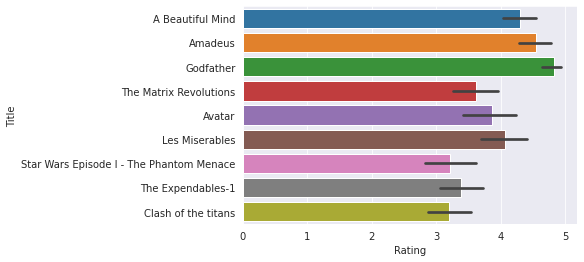

In [ ]:
# import matplotlib.pyplot as plt
grp_title = df.groupby('Title')
sns.barplot(x='Rating', y='Title', data=df)

In [ ]:
df = df.drop(['Title'], axis=1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,Comment,Polarity,Rating
0,"THis is a beautiful story, but the reality is ...",1,4
1,"Although this film was slow paced, it was kept...",1,4
2,Let me start by saying it doesn't matter how m...,1,5
3,I absolutely liked watching this film because ...,1,5
4,'A Beautiful Mind' had a lot going for it. An ...,1,4
...,...,...,...
45,"Don't get me wrong, I like the whole movie st...",1,3
46,Clash of the Titans is directed by Louis Leter...,0,3
47,The remake of a cult classic. Ray Harryhausen ...,1,4
48,Story/Plot - A war between Zeus and Hades is a...,0,3


## Display Ratings and Polarity

We are trying to show the distrubtion of **Rating and Polarity** in the particular data

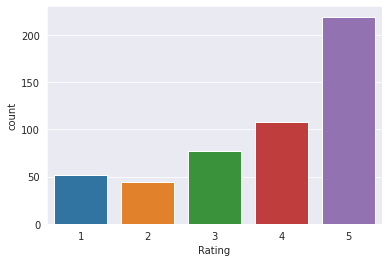

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Rating', data=df)

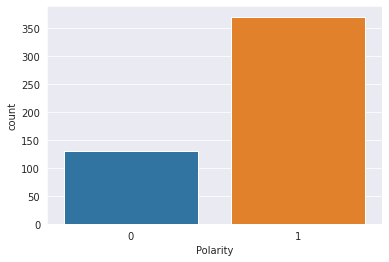

In [ ]:
sns.countplot(x='Polarity', data=df)

## Pre-Processing - Text

Here we remove stopwords and punctuations and store it as [**Review**] in Data

In [ ]:
def get_text_processing(text):
  stpwrd = stopwords.words('english')
  no_punctuation = [char for char in text if char not in string.punctuation]
  no_punctuation = ''.join(no_punctuation)
  return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpwrd])

In [ ]:
df['Review'] = df['Comment'].apply(get_text_processing)

In [ ]:
df.head()

,Comment,Polarity,Rating,Review
0,"THis is a beautiful story, but the reality is ...",1,4,beautiful story reality beautiful real biograp...
1,"Although this film was slow paced, it was kept...",1,4,Although film slow paced kept float Russell Cr...
2,Let me start by saying it doesn't matter how m...,1,5,Let start saying doesnt matter much heard movi...
3,I absolutely liked watching this film because ...,1,5,absolutely liked watching film wonderful actre...
4,'A Beautiful Mind' had a lot going for it. An ...,1,4,Beautiful Mind lot going intriguing story base...


In [ ]:
df = df[['Review', 'Rating']]
df.head()

,Review,Rating
0,beautiful story reality beautiful real biograp...,4
1,Although film slow paced kept float Russell Cr...,4
2,Let start saying doesnt matter much heard movi...,5
3,absolutely liked watching film wonderful actre...,5
4,Beautiful Mind lot going intriguing story base...,4


Converting Rating column to 1 to 5 columns using One-Hot Encoding

In [ ]:
temp = pd.get_dummies(df['Rating'])
df.drop('Rating', axis=1, inplace=True)
df = pd.concat([df, temp], axis=1)
df.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Review,1,2,3,4,5
0,beautiful story reality beautiful real biograp...,0,0,0,1,0
1,Although film slow paced kept float Russell Cr...,0,0,0,1,0
2,Let start saying doesnt matter much heard movi...,0,0,0,0,1
3,absolutely liked watching film wonderful actre...,0,0,0,0,1
4,Beautiful Mind lot going intriguing story base...,0,0,0,1,0


- Spliting the Data into Train and Test
- Vectorising the text data
- Then using Tfidf Transformer on it

In [ ]:
X = df['Review'].values
y = df.drop('Review', axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [ ]:
final_X = X_test.copy()
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

In [ ]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train).toarray()
X_test = tfidf.transform(X_test).toarray()

## Building and Fitting Model

- Using Sequential as base we add a few layers that have an activation='relu'
- Fitting the model

In [ ]:
model = Sequential()

model.add(Dense(units=8510,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=4000,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units=5, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='max', verbose=1, patience=2)

In [ ]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=8,
    epochs=10,
    validation_data=(X_test, y_test),
    verbose=1,
    callbacks=early_stop
)

Epoch 1/10
50/50 [==============================] - 51s 983ms/step - loss: 1.4043 - accuracy: 0.4475 - val_loss: 1.3620 - val_accuracy: 0.4700
Epoch 2/10
50/50 [==============================] - 32s 644ms/step - loss: 0.6461 - accuracy: 0.7175 - val_loss: 1.5085 - val_accuracy: 0.4700
Epoch 3/10
50/50 [==============================] - 32s 644ms/step - loss: 0.1897 - accuracy: 0.9175 - val_loss: 2.0943 - val_accuracy: 0.4500
Epoch 4/10
50/50 [==============================] - 33s 659ms/step - loss: 0.0156 - accuracy: 0.9975 - val_loss: 2.1882 - val_accuracy: 0.3900
Epoch 5/10
50/50 [==============================] - 32s 643ms/step - loss: 5.8007e-04 - accuracy: 1.0000 - val_loss: 2.1543 - val_accuracy: 0.4200
Epoch 6/10
50/50 [==============================] - 32s 643ms/step - loss: 6.6268e-05 - accuracy: 1.0000 - val_loss: 2.1739 - val_accuracy: 0.4200
Epoch 6: early stopping


Evaluating the model, using **model score**

In [ ]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

2/2 [==============================] - 1s 214ms/step - loss: 2.1739 - accuracy: 0.4200
Test accuracy: 0.41999998688697815


Predicting the data

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
X_train.shape

(400, 9549)

In [ ]:
y_pred.shape

(100, 5)

In [ ]:
row_index = y_pred.argmax(axis=1)

In [ ]:
row_index

array([4, 2, 1, 3, 4, 3, 2, 4, 0, 3, 4, 3, 4, 3, 3, 1, 3, 3, 1, 4, 3, 0,
       0, 1, 4, 3, 1, 3, 1, 4, 4, 3, 4, 4, 4, 3, 4, 1, 1, 4, 4, 4, 1, 4,
       2, 4, 3, 1, 3, 4, 4, 4, 1, 1, 0, 4, 1, 1, 4, 3, 4, 4, 1, 4, 1, 4,
       0, 1, 3, 4, 1, 4, 4, 1, 1, 0, 4, 2, 4, 3, 4, 4, 0, 2, 2, 4, 0, 3,
       4, 4, 4, 4, 4, 4, 1, 1, 3, 1, 0, 4])

In [ ]:
y_rating = y_test.argmax(axis=1)

In [ ]:
y_rating

array([3, 1, 0, 0, 4, 3, 3, 4, 2, 2, 4, 4, 3, 4, 4, 4, 4, 0, 3, 4, 3, 0,
       2, 2, 4, 2, 3, 4, 2, 4, 4, 0, 3, 4, 1, 2, 4, 3, 4, 2, 1, 4, 2, 3,
       2, 3, 4, 2, 3, 4, 3, 1, 1, 0, 0, 4, 1, 0, 4, 2, 4, 4, 2, 4, 4, 4,
       0, 2, 3, 4, 3, 4, 4, 3, 0, 0, 4, 2, 1, 3, 4, 4, 2, 4, 1, 4, 2, 2,
       4, 3, 4, 3, 4, 4, 4, 0, 4, 2, 4, 4])

As can be seen by comparing row_index
and y_rating
Have similar ratings. It is evident the model is still very usable and eventhough does not do complete justice to the comments, it certainly conveys the general feeling of comment.

In [ ]:
X_final = pd.DataFrame(data=zip(final_X,y_rating), columns=["Comment", "Rating"])

In [ ]:
X_final['Rating'] += 1

In [ ]:
X_final.head(10)

,Comment,Rating
0,beautiful story reality beautiful real biograp...,4
1,Okay start absolutely LOVE Anne Hathaway favor...,2
2,think long boring never heard John Nash film b...,1
3,science fiction adventure film set 2150s good ...,1
4,kinds awesome however also doesnt make excuses...,5
5,Ron Howards Beautiful Mind adaptation Pulitzer...,4
6,Recent decades seen growing interest movies de...,4
7,right say privilege watching Broadway play rea...,5
8,First found attempt humor time destruction unn...,3
9,Smile camera say CHEESE directions Wachowski b...,3


Displaying the Distribution of Rating across the Test comments

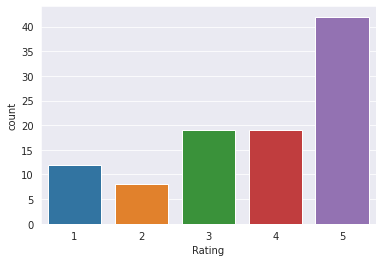

In [ ]:
sns.set_style('darkgrid')
sns.countplot(x='Rating', data=X_final)

In [ ]:
X_final.describe()

,Rating
count,100.000000
mean,3.710000
std,1.394759
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## User Comment Evaluation

Input Comment to be evaluated

In [ ]:
comment = [input("Enter a Comment by User : ")]

Enter a Comment by User : This was the best movie i have ever seen.


In [ ]:
review = get_text_processing(comment)

In [ ]:
review = tfidf.transform(vect.transform([review])).toarray()

In [ ]:
review

array([[0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
model.predict(review).argmax(axis=1)[0]+1

5

## Conclusion

As, it is pretty evident that the model works to a certain extent. To get even better results we need to make this model even more efficient. But, this model alone can also be used for basic evaluation of small and clean comments.